In [95]:
#conda install beautifulsoup4 lxml requests pillow
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup
from PIL import Image # pillow package (Python Image Library)
import io

In [96]:
url = 'https://www.fcbarcelona.com/en/football/first-team/players'

r = requests.get(url)  #get all the data from website
r.text[:100]

'<!DOCTYPE html>\n\n<html lang="en">\n<head>\n    \n    <meta name="twitter:title" content="Squad - FC Bar'

In [97]:
s = BeautifulSoup(r.text, 'lxml') #convert to lxml file
type(s)

bs4.BeautifulSoup

In [98]:
#prettify to be easy to read or organised
print(s.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="Squad - FC Barcelona Official Channel" name="twitter:title"/>
  <meta content="summary_large_image" name="twitter:card"/>
  <meta content="https://www.fcbarcelona.com/resources/v2.63.0-5317/i/elements/fcb-share.png" name="twitter:image"/>
  <meta content="https://www.fcbarcelona.com/resources/v2.63.0-5317/i/elements/fcb-share.png" property="og:image"/>
  <title>
   Squad - FC Barcelona Official Channel
  </title>
  <meta content="website" property="og:type"/>
  <meta content="All the information on Ansu Fati, Pedri, De Jong, Gerard Piqué and the rest of the Barça football first team" name="description"/>
  <meta content="@FCB" name="twitter:site"/>
  <meta content="All the information on Ansu Fati, Pedri, De Jong, Gerard Piqué and the rest of the Barça football first team" name="twitter:description"/>
  <meta content="Squad - FC Barcelona Official Channel" property="og:title"/>
  <link href="https://www.fcbarcelona.com/en/footba

In [99]:
members = s.select('div.team-list__person-container.js-team-list-player')

In [100]:
members

[<div class="team-list__person-container js-team-list-player" data-alltime-appearances-offset="1" data-alltime-assist-offset="" data-alltime-clean-sheet-offset="" data-alltime-goal-offset="" data-alltime-saves-offset="" data-alltime-tackle-offset="" data-current-team="49" data-player-id="11072" data-script="fcb_players" data-widget="player-slider-item">
 <a class="team-person js-focus-container" href="https://www.fcbarcelona.com/en/football/first-team/players/11072/marc-andre-ter-stegen">
 <figure class="team-person__container">
 <picture class="team-person__picture js-lazy-picture">
 <source data-image-src="            https://www.fcbarcelona.com/photo-resources/2022/11/02/d57390d3-5cd5-426f-a1b2-e4cefb1a3d9a/01-MARC-ANDRE_TER_STEGEN.jpg?width=470&amp;height=470
 ,             https://www.fcbarcelona.com/photo-resources/2022/11/02/d57390d3-5cd5-426f-a1b2-e4cefb1a3d9a/01-MARC-ANDRE_TER_STEGEN.jpg?width=940&amp;height=940
  2x" srcset="">
 <img alt="01-MARC-ANDRE_TER_STEGEN" class="team

In [101]:
len(members)

21

In [102]:
members[0]

<div class="team-list__person-container js-team-list-player" data-alltime-appearances-offset="1" data-alltime-assist-offset="" data-alltime-clean-sheet-offset="" data-alltime-goal-offset="" data-alltime-saves-offset="" data-alltime-tackle-offset="" data-current-team="49" data-player-id="11072" data-script="fcb_players" data-widget="player-slider-item">
<a class="team-person js-focus-container" href="https://www.fcbarcelona.com/en/football/first-team/players/11072/marc-andre-ter-stegen">
<figure class="team-person__container">
<picture class="team-person__picture js-lazy-picture">
<source data-image-src="            https://www.fcbarcelona.com/photo-resources/2022/11/02/d57390d3-5cd5-426f-a1b2-e4cefb1a3d9a/01-MARC-ANDRE_TER_STEGEN.jpg?width=470&amp;height=470
,             https://www.fcbarcelona.com/photo-resources/2022/11/02/d57390d3-5cd5-426f-a1b2-e4cefb1a3d9a/01-MARC-ANDRE_TER_STEGEN.jpg?width=940&amp;height=940
 2x" srcset="">
<img alt="01-MARC-ANDRE_TER_STEGEN" class="team-person_

In [103]:
members[0].select_one('a')

<a class="team-person js-focus-container" href="https://www.fcbarcelona.com/en/football/first-team/players/11072/marc-andre-ter-stegen">
<figure class="team-person__container">
<picture class="team-person__picture js-lazy-picture">
<source data-image-src="            https://www.fcbarcelona.com/photo-resources/2022/11/02/d57390d3-5cd5-426f-a1b2-e4cefb1a3d9a/01-MARC-ANDRE_TER_STEGEN.jpg?width=470&amp;height=470
,             https://www.fcbarcelona.com/photo-resources/2022/11/02/d57390d3-5cd5-426f-a1b2-e4cefb1a3d9a/01-MARC-ANDRE_TER_STEGEN.jpg?width=940&amp;height=940
 2x" srcset="">
<img alt="01-MARC-ANDRE_TER_STEGEN" class="team-person__image" data-image-src="https://www.fcbarcelona.com/photo-resources/2022/11/02/d57390d3-5cd5-426f-a1b2-e4cefb1a3d9a/01-MARC-ANDRE_TER_STEGEN.jpg?width=470&amp;height=470" src=""/>
</source></picture>
<figcaption class="team-person__text">
<div class="team-person__info">
<p class="team-person__info-top">
<span class="team-person__large-name">Stegen</span

In [104]:
members[0].select_one('a')['href'] 

'https://www.fcbarcelona.com/en/football/first-team/players/11072/marc-andre-ter-stegen'

In [105]:
members[0].select_one('span.team-person__number')

<span class="team-person__number">1</span>

In [106]:
members[0].select_one('span.team-person__number').text

'1'

In [107]:
members[0].select_one('p.team-person__info-top')

<p class="team-person__info-top">
<span class="team-person__large-name">Stegen</span>
<span class="team-person__number">1</span>
<span class="team-person__first-name js-team-list-player-first-name">Marc-André</span>
<span class="team-person__last-name js-team-list-player-last-name">ter Stegen</span>
</p>

In [108]:
members[0].select_one('p.team-person__info-top').text

'\nStegen\n1\nMarc-André\nter Stegen\n'

In [109]:
members[0].select_one('p.team-person__info-top').select('span')[0].text

'Stegen'

In [110]:
members[0].select_one('p.team-person__info-top').select('span')[1].text

'1'

In [111]:
members[0].select_one('p.team-person__info-top').select('span')[2].text

'Marc-André'

In [112]:
members[0].select_one('p.team-person__info-top').select('span')[3].text

'ter Stegen'

In [113]:
members[0]

<div class="team-list__person-container js-team-list-player" data-alltime-appearances-offset="1" data-alltime-assist-offset="" data-alltime-clean-sheet-offset="" data-alltime-goal-offset="" data-alltime-saves-offset="" data-alltime-tackle-offset="" data-current-team="49" data-player-id="11072" data-script="fcb_players" data-widget="player-slider-item">
<a class="team-person js-focus-container" href="https://www.fcbarcelona.com/en/football/first-team/players/11072/marc-andre-ter-stegen">
<figure class="team-person__container">
<picture class="team-person__picture js-lazy-picture">
<source data-image-src="            https://www.fcbarcelona.com/photo-resources/2022/11/02/d57390d3-5cd5-426f-a1b2-e4cefb1a3d9a/01-MARC-ANDRE_TER_STEGEN.jpg?width=470&amp;height=470
,             https://www.fcbarcelona.com/photo-resources/2022/11/02/d57390d3-5cd5-426f-a1b2-e4cefb1a3d9a/01-MARC-ANDRE_TER_STEGEN.jpg?width=940&amp;height=940
 2x" srcset="">
<img alt="01-MARC-ANDRE_TER_STEGEN" class="team-person_

In [115]:
members[0].select_one('img')

<img alt="01-MARC-ANDRE_TER_STEGEN" class="team-person__image" data-image-src="https://www.fcbarcelona.com/photo-resources/2022/11/02/d57390d3-5cd5-426f-a1b2-e4cefb1a3d9a/01-MARC-ANDRE_TER_STEGEN.jpg?width=470&amp;height=470" src=""/>

In [116]:
type(members[0].select_one('img'))

bs4.element.Tag

In [117]:
members[0].select_one('img')['alt']

'01-MARC-ANDRE_TER_STEGEN'

In [136]:
members[0].select_one('img')['alt'].split('_')

['01-MARC-ANDRE', 'TER', 'STEGEN']

In [137]:
members[0].select_one('img')['alt'].split('_')[0]

'01-MARC-ANDRE'

In [138]:
members[0].select_one('img')['alt'].split('_')[0].split('-')

['01', 'MARC', 'ANDRE']

In [152]:
members[0].select_one('img')['alt'].split('_')[0].split('-').remove('01')


In [139]:
members[0].select_one('img')['data-image-src']

'https://www.fcbarcelona.com/photo-resources/2022/11/02/d57390d3-5cd5-426f-a1b2-e4cefb1a3d9a/01-MARC-ANDRE_TER_STEGEN.jpg?width=470&height=470'

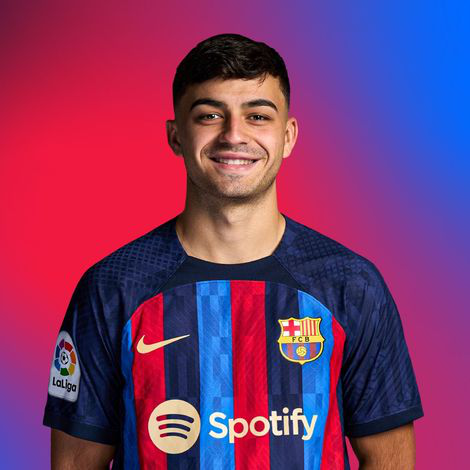

In [140]:
r1 = requests.get(members[10].select_one('img')['data-image-src'])
img = Image.open(io.BytesIO(r1.content))
img

In [141]:
members[0:3]

[<div class="team-list__person-container js-team-list-player" data-alltime-appearances-offset="1" data-alltime-assist-offset="" data-alltime-clean-sheet-offset="" data-alltime-goal-offset="" data-alltime-saves-offset="" data-alltime-tackle-offset="" data-current-team="49" data-player-id="11072" data-script="fcb_players" data-widget="player-slider-item">
 <a class="team-person js-focus-container" href="https://www.fcbarcelona.com/en/football/first-team/players/11072/marc-andre-ter-stegen">
 <figure class="team-person__container">
 <picture class="team-person__picture js-lazy-picture">
 <source data-image-src="            https://www.fcbarcelona.com/photo-resources/2022/11/02/d57390d3-5cd5-426f-a1b2-e4cefb1a3d9a/01-MARC-ANDRE_TER_STEGEN.jpg?width=470&amp;height=470
 ,             https://www.fcbarcelona.com/photo-resources/2022/11/02/d57390d3-5cd5-426f-a1b2-e4cefb1a3d9a/01-MARC-ANDRE_TER_STEGEN.jpg?width=940&amp;height=940
  2x" srcset="">
 <img alt="01-MARC-ANDRE_TER_STEGEN" class="team

In [142]:
lst=[]
for e in members[:3]:
#for e in members:
    mem_img_url = e.select_one('img')['data-image-src']
    mem_name = e.select_one('img')['alt']
    mem_number = e.select_one('span.team-person__number').text
    mem_link = f"https://www.fcbarcelona.com{e.select_one('a')['href']}"
    print(f'{mem_name} {mem_number} {mem_img_url} {mem_link}')
    lst.append([mem_name, mem_number, mem_img_url, mem_link])
#   r=requests.get(mem_img_url)
#   img=Image.open(io.BytesIO(r.content))
#   save_img(f'{mem_name}_{mem_number}.jpg', r.content)
#   img.show()
lst[:3]

01-MARC-ANDRE_TER_STEGEN 1 https://www.fcbarcelona.com/photo-resources/2022/11/02/d57390d3-5cd5-426f-a1b2-e4cefb1a3d9a/01-MARC-ANDRE_TER_STEGEN.jpg?width=470&height=470 https://www.fcbarcelona.comhttps://www.fcbarcelona.com/en/football/first-team/players/11072/marc-andre-ter-stegen
26-INAKI_PENA 13 https://www.fcbarcelona.com/photo-resources/2022/11/02/b17b8c7c-8385-4911-9629-39cffc9773d2/26-INAKI_PENA.jpg?width=470&height=470 https://www.fcbarcelona.comhttps://www.fcbarcelona.com/en/football/first-team/players/53621/ignacio-pena-sotorres
02-HECTOR_BELLERIN_ 2 https://www.fcbarcelona.com/photo-resources/2022/11/02/002805b5-17b0-46bf-849a-00a1e63a2ddd/02-HECTOR_BELLERIN_.jpg?width=470&height=470 https://www.fcbarcelona.comhttps://www.fcbarcelona.com/en/football/first-team/players/4474/hector-bellerin


[['01-MARC-ANDRE_TER_STEGEN',
  '1',
  'https://www.fcbarcelona.com/photo-resources/2022/11/02/d57390d3-5cd5-426f-a1b2-e4cefb1a3d9a/01-MARC-ANDRE_TER_STEGEN.jpg?width=470&height=470',
  'https://www.fcbarcelona.comhttps://www.fcbarcelona.com/en/football/first-team/players/11072/marc-andre-ter-stegen'],
 ['26-INAKI_PENA',
  '13',
  'https://www.fcbarcelona.com/photo-resources/2022/11/02/b17b8c7c-8385-4911-9629-39cffc9773d2/26-INAKI_PENA.jpg?width=470&height=470',
  'https://www.fcbarcelona.comhttps://www.fcbarcelona.com/en/football/first-team/players/53621/ignacio-pena-sotorres'],
 ['02-HECTOR_BELLERIN_',
  '2',
  'https://www.fcbarcelona.com/photo-resources/2022/11/02/002805b5-17b0-46bf-849a-00a1e63a2ddd/02-HECTOR_BELLERIN_.jpg?width=470&height=470',
  'https://www.fcbarcelona.comhttps://www.fcbarcelona.com/en/football/first-team/players/4474/hector-bellerin']]

In [143]:
pd.options.display.max_colwidth = 0

In [144]:
df=pd.DataFrame(lst, columns=['name', 'number', 'img_url', 'link'])
df.head()

,name,number,img_url,link
0,01-MARC-ANDRE_TER_STEGEN,1,https://www.fcbarcelona.com/photo-resources/2022/11/02/d57390d3-5cd5-426f-a1b2-e4cefb1a3d9a/01-MARC-ANDRE_TER_STEGEN.jpg?width=470&height=470,https://www.fcbarcelona.comhttps://www.fcbarcelona.com/en/football/first-team/players/11072/marc-andre-ter-stegen
1,26-INAKI_PENA,13,https://www.fcbarcelona.com/photo-resources/2022/11/02/b17b8c7c-8385-4911-9629-39cffc9773d2/26-INAKI_PENA.jpg?width=470&height=470,https://www.fcbarcelona.comhttps://www.fcbarcelona.com/en/football/first-team/players/53621/ignacio-pena-sotorres
2,02-HECTOR_BELLERIN_,2,https://www.fcbarcelona.com/photo-resources/2022/11/02/002805b5-17b0-46bf-849a-00a1e63a2ddd/02-HECTOR_BELLERIN_.jpg?width=470&height=470,https://www.fcbarcelona.comhttps://www.fcbarcelona.com/en/football/first-team/players/4474/hector-bellerin


In [145]:
from IPython.display import HTML

In [130]:
def to_html_img(url, alt=None, width=100):
    if alt==None:
        alt=''
    return f'<img alt="{alt}" src="{url}" width="{width}"/>'

In [131]:
to_html_img('https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132595_misc_general_500.jpeg')

'<img alt="" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132595_misc_general_500.jpeg" width="100"/>'

In [132]:
df['img']=df.apply(lambda r: to_html_img(r['img_url'],r['name'], 100), axis=1)
df.head()
#add column image as html file

,name,number,img_url,link,img
0,01-MARC-ANDRE_TER_STEGEN,1,https://www.fcbarcelona.com/photo-resources/2022/11/02/d57390d3-5cd5-426f-a1b2-e4cefb1a3d9a/01-MARC-ANDRE_TER_STEGEN.jpg?width=470&height=470,https://www.fcbarcelona.comhttps://www.fcbarcelona.com/en/football/first-team/players/11072/marc-andre-ter-stegen,"<img alt=""01-MARC-ANDRE_TER_STEGEN"" src=""https://www.fcbarcelona.com/photo-resources/2022/11/02/d57390d3-5cd5-426f-a1b2-e4cefb1a3d9a/01-MARC-ANDRE_TER_STEGEN.jpg?width=470&height=470"" width=""100""/>"
1,26-INAKI_PENA,13,https://www.fcbarcelona.com/photo-resources/2022/11/02/b17b8c7c-8385-4911-9629-39cffc9773d2/26-INAKI_PENA.jpg?width=470&height=470,https://www.fcbarcelona.comhttps://www.fcbarcelona.com/en/football/first-team/players/53621/ignacio-pena-sotorres,"<img alt=""26-INAKI_PENA"" src=""https://www.fcbarcelona.com/photo-resources/2022/11/02/b17b8c7c-8385-4911-9629-39cffc9773d2/26-INAKI_PENA.jpg?width=470&height=470"" width=""100""/>"
2,02-HECTOR_BELLERIN_,2,https://www.fcbarcelona.com/photo-resources/2022/11/02/002805b5-17b0-46bf-849a-00a1e63a2ddd/02-HECTOR_BELLERIN_.jpg?width=470&height=470,https://www.fcbarcelona.comhttps://www.fcbarcelona.com/en/football/first-team/players/4474/hector-bellerin,"<img alt=""02-HECTOR_BELLERIN_"" src=""https://www.fcbarcelona.com/photo-resources/2022/11/02/002805b5-17b0-46bf-849a-00a1e63a2ddd/02-HECTOR_BELLERIN_.jpg?width=470&height=470"" width=""100""/>"


In [133]:
HTML(df[:3][['name', 'number', 'img']].to_html(escape=False))

,name,number,img
0,01-MARC-ANDRE_TER_STEGEN,1,
1,26-INAKI_PENA,13,
2,02-HECTOR_BELLERIN_,2,


In [153]:
#to create link/hyperlink
def to_html_a(url, text): #a is reference as text 
    if text==None:
        text=''
    return f'<a href="{url}">{text}</a'

In [154]:
to_html_a('https://www.liverpoolfc.com/team/first-team/player/alisson-becker', '<img alt="" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69996_misc_general_500.jpeg" width="100"/>')

'<a href="https://www.liverpoolfc.com/team/first-team/player/alisson-becker"><img alt="" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69996_misc_general_500.jpeg" width="100"/></a'

In [155]:
#hyperlink with name
df['a']=df.apply(lambda r: to_html_a(r['link'],r['name']), axis=1)
df.head()

,name,number,img_url,link,a
0,01-MARC-ANDRE_TER_STEGEN,1,https://www.fcbarcelona.com/photo-resources/2022/11/02/d57390d3-5cd5-426f-a1b2-e4cefb1a3d9a/01-MARC-ANDRE_TER_STEGEN.jpg?width=470&height=470,https://www.fcbarcelona.comhttps://www.fcbarcelona.com/en/football/first-team/players/11072/marc-andre-ter-stegen,"<a href=""https://www.fcbarcelona.comhttps://www.fcbarcelona.com/en/football/first-team/players/11072/marc-andre-ter-stegen"">01-MARC-ANDRE_TER_STEGEN</a"
1,26-INAKI_PENA,13,https://www.fcbarcelona.com/photo-resources/2022/11/02/b17b8c7c-8385-4911-9629-39cffc9773d2/26-INAKI_PENA.jpg?width=470&height=470,https://www.fcbarcelona.comhttps://www.fcbarcelona.com/en/football/first-team/players/53621/ignacio-pena-sotorres,"<a href=""https://www.fcbarcelona.comhttps://www.fcbarcelona.com/en/football/first-team/players/53621/ignacio-pena-sotorres"">26-INAKI_PENA</a"
2,02-HECTOR_BELLERIN_,2,https://www.fcbarcelona.com/photo-resources/2022/11/02/002805b5-17b0-46bf-849a-00a1e63a2ddd/02-HECTOR_BELLERIN_.jpg?width=470&height=470,https://www.fcbarcelona.comhttps://www.fcbarcelona.com/en/football/first-team/players/4474/hector-bellerin,"<a href=""https://www.fcbarcelona.comhttps://www.fcbarcelona.com/en/football/first-team/players/4474/hector-bellerin"">02-HECTOR_BELLERIN_</a"


In [158]:
HTML(df[:3][['name','number','img', 'a']].to_html(escape=False))

KeyError: "['img'] not in index"

In [159]:
#hyperlink with image
df['a2']=df.apply(lambda r: to_html_a(r['link'],r['img']), axis=1)
df.head()

KeyError: 'img'